In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from datetime import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def num_to_date(num):
    date = num % 100
    num = num // 100
    month = num % 100
    year = num // 100
    return pd.to_datetime((str(month) + "/" + str(date) + "/" + str(year)))



In [2]:
def fix_date_type(df):
    df['date'] = df['date'].map(num_to_date)

In [3]:
def line_graph(df, states, x = 15, y = 10,font = 25, alpha_val = 0.7, legend_font = 10, rotate = True,
               y_axis = "positiveIncrease", log_y = False, rolling_avg = False, rolling_avg_len = 7,
               filename = '2019_US_Pop.csv'):
    
    census = pd.read_csv(filename)
    fig, ax = plt.subplots(figsize = (x, y))
    
    for state in states:
        state_df = df[df['state'] == state]

        if(log_y):
            plt.plot(state_df['date'], np.log(state_df[y_axis]), alpha = alpha_val, label = "Log of " + y_axis + " in " + state)
        else:
            plt.plot(state_df['date'], state_df[y_axis], alpha = alpha_val, label = y_axis + " in " + state)

        if(rolling_avg):
            pd.options.mode.chained_assignment = None
            new_col_name = str(rolling_avg_len) + 'ra_' + str(y_axis)
            state_df[new_col_name] = state_df[y_axis].rolling(rolling_avg_len).mean()
            plt.plot(state_df['date'], state_df[new_col_name], alpha = alpha_val, label = str(rolling_avg_len) + ' day rolling average for ' + str(state))
        
    
    if(log_y):
        plt.title("Log of " + y_axis + " vs Date", fontsize = font)
        plt.ylabel("Log of " + y_axis, fontsize = font)
    else:
        plt.title(y_axis + " vs Date", fontsize = font)
        plt.ylabel(y_axis, fontsize = font)
        
    plt.legend(fontsize = legend_font)
    plt.xlabel("Date", fontsize = font)
        

In [4]:
def box_plot(df, states, census_data = "2019_US_Pop.csv", x = 15, y = 10,font = 25, alpha_val = 0.7, legend_font = 10, rotate = True,
               y_axis = "positiveIncrease", log_y = False, norm_x = False):

    state_df = df[covid.state.isin(states)]
    
    state_df.boxplot(by = "state", column=[y_axis], figsize = (x,y), fontsize = font)
    
    plt.title("Boxplot of " + y_axis + " by State")
    plt.ylabel(y_axis, fontsize = font)
    plt.xlabel("State", fontsize = font)

In [5]:
def top_n(df, n = 5, measure = 'positiveIncrease', date = date.today() - timedelta(days=1), top = True):
    date_filter = df[df['date'] == pd.to_datetime(date)]

    date_filter = date_filter[['date', 'state', measure]]
    
    if (top):
        return date_filter.nlargest(n, measure)
    else:
        return date_filter.nsmallest(n, measure)

In [6]:
def scatter_plot(df, states, x_axis = 'deathIncrease', y_axis = 'positiveIncrease', s = None, c = None, font = 25, legend_font = 10):
    # df.plot.scatter(x_axis, y_axis)
    for state in states:
        state_df = df[df['state'] == state]
        plt.scatter(state_df[[x_axis]], state_df[[y_axis]], label = state)

    positivity_rates = [0.05, 0.1, 0.2]

    for rate in positivity_rates:
        temp = df[df.state.isin(states)]
        nmax = temp['negative'].max()
        plt.plot([0,nmax], [0, nmax*rate/(1-rate)], 'go--', alpha = 0.5, label = str(rate*100) + "% positivity rate")

    plt.title("Scatterplot of " + y_axis + " against " + x_axis)
    plt.ylabel(y_axis, fontsize = font)
    plt.xlabel(x_axis, fontsize = font)

    temp = df[df.state.isin(states)]
    pmax = temp['positive'].max()

    plt.ylim(0,pmax)

    plt.legend(fontsize = legend_font)


In [7]:
plt.style.use('fivethirtyeight')

## Loading data

In [8]:
covid = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

deprecated_fields = ['checkTimeEt', 'commercialScore', 'dateChecked',
                     'dateModified', 'grade', 'hospitalized', 'negativeIncrease',
                     'negativeRegularScore', 'negativeScore', 'posNeg',
                     'positiveScore', 'score', 'total']

covid.drop(deprecated_fields,axis = 1)

fix_date_type(covid)

covid.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-08-24,AK,5628.0,324875.0,NaN,43.0,NaN,NaN,NaN,8.0,...,330503,0,0,54865e3eaef9af79f98d4ca570197186492760a0,0,0,0,0,0,NaN
1,2020-08-24,AL,116710.0,806609.0,NaN,1149.0,13793.0,NaN,1391.0,NaN,...,923319,11,291,2fe1d500d143b2a7f02117934c2c53d0b2648560,0,0,0,0,0,NaN
2,2020-08-24,AR,56894.0,616810.0,NaN,466.0,3962.0,NaN,NaN,108.0,...,673704,9,42,51dc585c49ed43ee35e01760e30b6b7aa792afe6,0,0,0,0,0,NaN
3,2020-08-24,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,c878baea61754904c3c233d78e523723e2f4a8e1,0,0,0,0,0,NaN
4,2020-08-24,AZ,198414.0,958808.0,NaN,908.0,21219.0,345.0,NaN,176.0,...,1157222,0,-22,a3a22a4967b6ca06481f5aa38b1c59235db23f87,0,0,0,0,0,NaN


## Calling Functions

In [9]:
top_n(covid, n = 5, measure = "positiveIncrease", top = True, date = '6/4/2020')

,date,state,positiveIncrease
4541,2020-06-04,CA,2120
4583,2020-06-04,TX,1649
4546,2020-06-04,FL,1419
4566,2020-06-04,NC,1189
4573,2020-06-04,NY,1048


In [10]:
top_n(covid, n = 5, measure = "positiveIncrease", top = True)

,date,state,positiveIncrease
5,2020-08-24,CA,4946
47,2020-08-24,TX,2847
11,2020-08-24,GA,2304
10,2020-08-24,FL,2258
17,2020-08-24,IN,1660


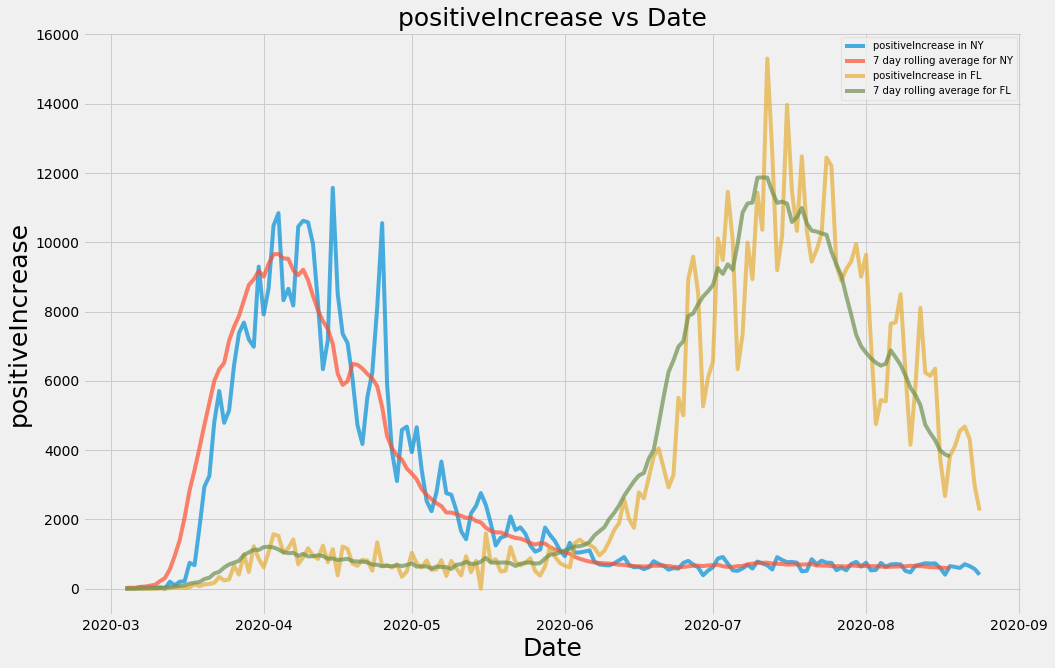

In [11]:
line_graph(covid,["NY","FL"], y_axis = "positiveIncrease", rolling_avg = True, rolling_avg_len = 7)

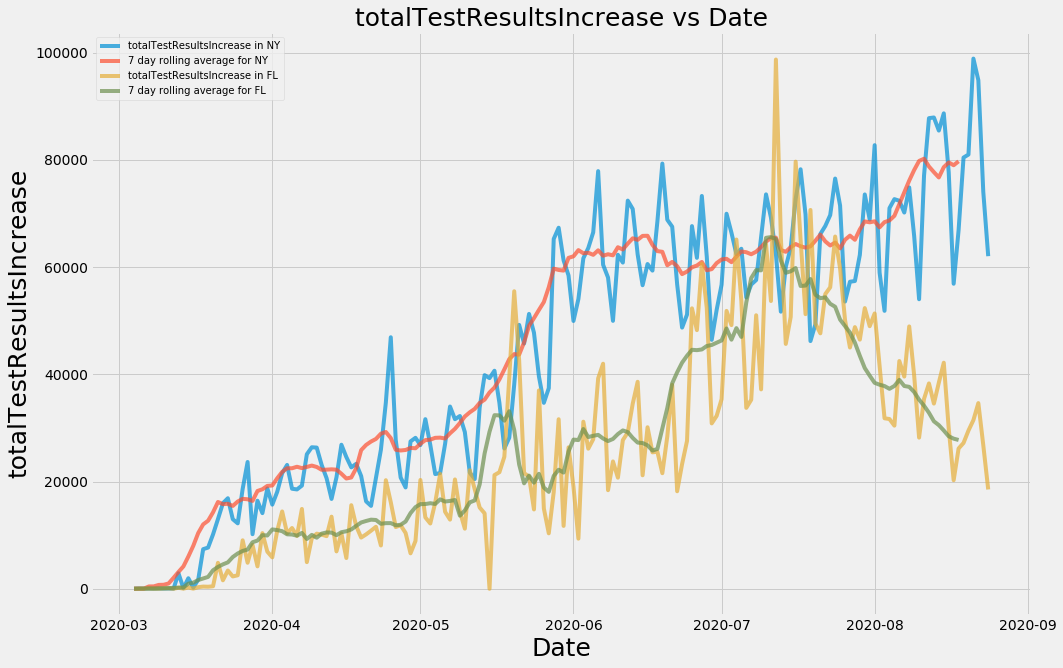

In [12]:
line_graph(covid,["NY","FL"], y_axis = "totalTestResultsIncrease", rolling_avg = True, rolling_avg_len = 7)

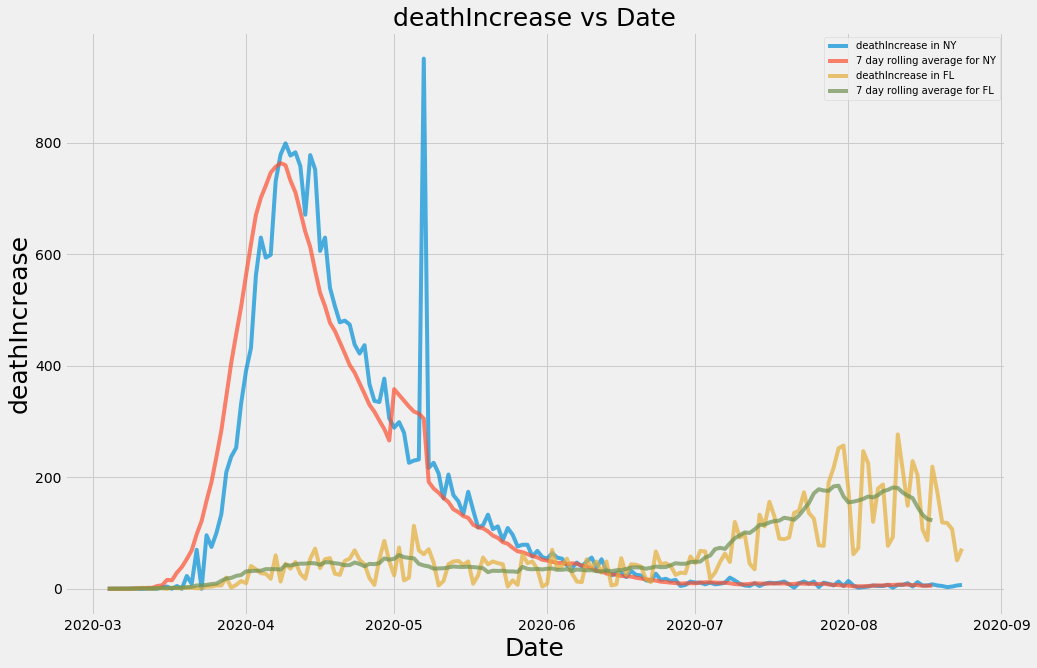

In [13]:
line_graph(covid,["NY","FL"], y_axis = "deathIncrease", rolling_avg = True, rolling_avg_len = 7)

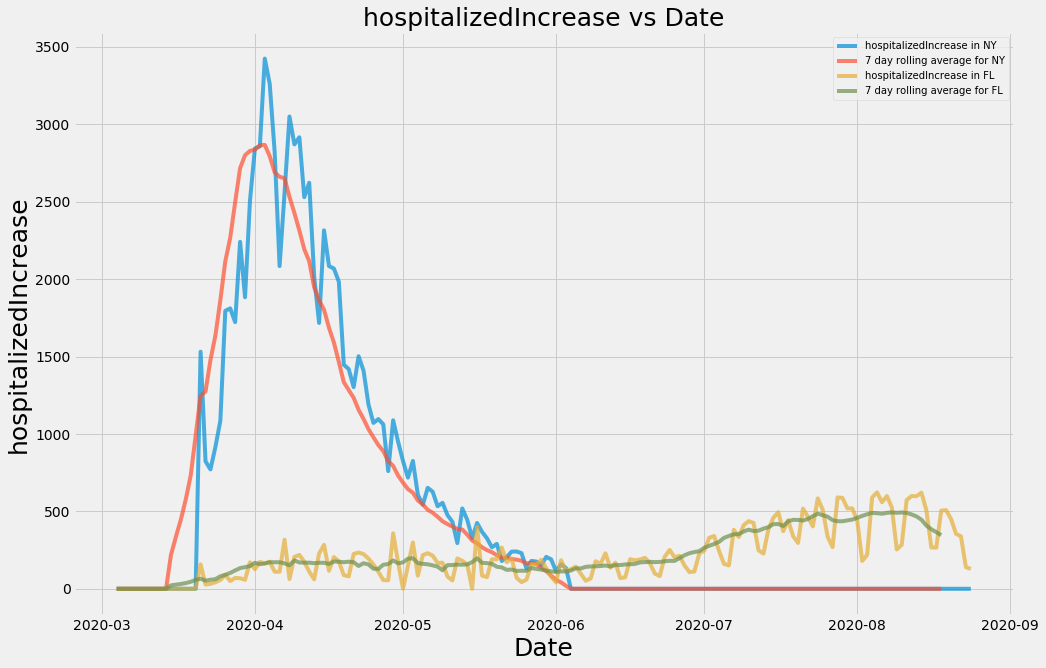

In [14]:
line_graph(covid,["NY","FL"], y_axis = "hospitalizedIncrease", rolling_avg_len = 7, log_y = False, rolling_avg = True)

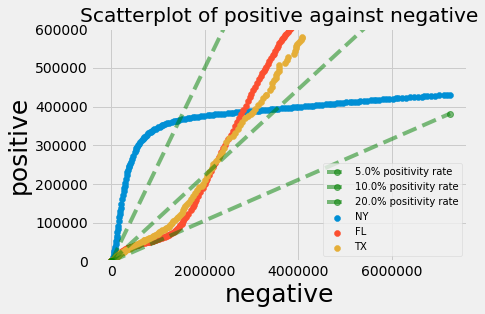

In [15]:
scatter_plot(covid, ['NY','FL', 'TX'], x_axis = 'negative', y_axis = 'positive')

# Google Mobility

In [16]:
global_mobility = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=40cc349b4e4ae7b5')
usa_mobility = global_mobility[global_mobility['country_region_code'] == 'US']


In [17]:
usa_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1385244,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1385245,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
1385246,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
1385247,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
1385248,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [18]:
global_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [19]:
len(usa_mobility['sub_region_2'].unique())

1717

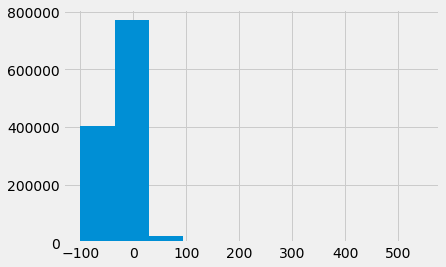

In [20]:
global_mobility['retail_and_recreation_percent_change_from_baseline'].hist()